In [4]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
plt.style.use('seaborn')

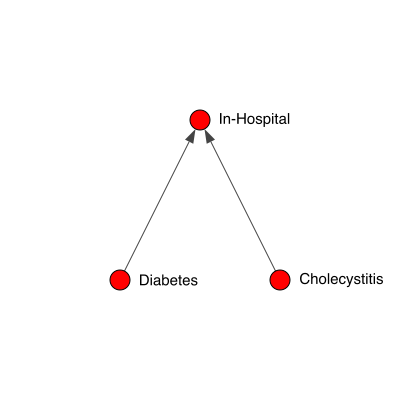

In [5]:
g2 = ig.Graph.Adjacency(np.array([[0, 0, 1], [0, 0, 1],[0, 0, 0]]).tolist())

g2.vs['label'] = ['Diabetes','Cholecystitis','In-Hospital']
g2.vs['label_size'] = 15
layout = g2.layout_reingold_tilford(mode="in", root=[2])
ig.plot(g2, 'Images/Berkson_Graph.png', layout=layout,vertex_label_dist=2,vertex_label_angle=0,bbox=(400, 400), margin=120)


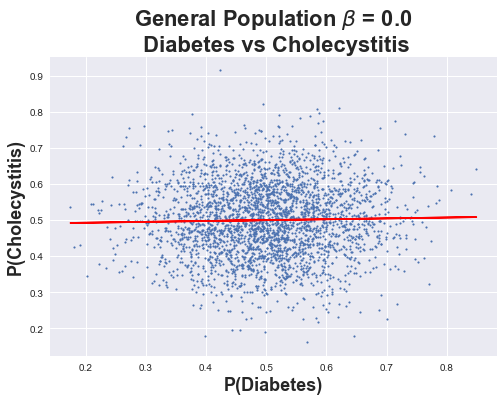

In [6]:
N = 3000

fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)
diabetes = np.random.normal(0.5,0.1,N)
cholecystitis = np.random.normal(0.5,0.1,N)

plt.scatter(diabetes,cholecystitis,s=3)
m, b = np.polyfit(diabetes, cholecystitis, 1)
ax.plot(diabetes, m*diabetes+b,c='r')

ax.set_title(r'General Population $\beta$ = {:.1f}'.format(m) + '\n Diabetes vs Cholecystitis',fontweight='bold',fontsize = 22)
ax.set_xlabel('P(Diabetes)',fontweight='bold',fontsize = 18)
ax.set_ylabel('P(Cholecystitis)',fontweight='bold',fontsize = 18)
ax.grid(True)
fig.savefig('Images/Berkson_1.png',bbox_inches='tight')

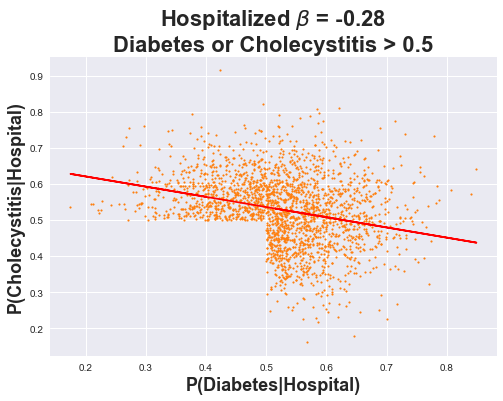

In [7]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)
diabetes_hospital = diabetes[np.logical_or(diabetes > 0.5,cholecystitis > 0.5)]
cholecystitis_hospital = cholecystitis[np.logical_or(diabetes > 0.5,cholecystitis > 0.5)]

ax.scatter(diabetes_hospital,cholecystitis_hospital,s=3,c='tab:orange')
m, b = np.polyfit(diabetes_hospital, cholecystitis_hospital, 1)
ax.plot(diabetes_hospital, m*diabetes_hospital+b,c='r')


ax.set_title(r'Hospitalized $\beta$ = {:.2f}'.format(m) +  '\nDiabetes or Cholecystitis > 0.5',fontweight='bold',fontsize = 22)
ax.set_xlabel('P(Diabetes|Hospital)',fontweight='bold',fontsize = 18)
ax.set_ylabel('P(Cholecystitis|Hospital)',fontweight='bold',fontsize = 18)
ax.grid(True)
fig.savefig('Images/Berkson_2.png',bbox_inches='tight')